## Group: Jingmin Chen, Tianyu Sun


# Intruduction

In this assignment I'll explore relastionship between mushrooms' color and their other features. My dataset comes from UCI Machine Learning website. To achieve this, I'll perfrom my data science work on the dataset and use decision tree and random forest to predict mushrooms' color by their other features.

My work will roughly contains following steps.

1.  fetch the dataset and load them from file
2.  understand meanings of each explanatory variables
3.  perform necessary EDA to gain useful information for further work
4.  perform data preparation on the dataset to get a useable format of the dataset
5.  perform variable selection to get several subsets
6.  perform train-test split on these subsets to get several train sets and test sets. And then train models on them

What's more, the detail of each step will be given bellow.

In [48]:
# load python libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import normalized_mutual_info_score, accuracy_score, make_scorer, precision_score, recall_score, classification_report, multilabel_confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import chi2_contingency
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

## Loading dataset and understanding on features

In this part I'll fetch the dataset and load it into Python. And then I'll read the explanations of each variable through the internet.

In [49]:
# load data from file
# don't use first row as col name
data = pd.read_csv('https://raw.githubusercontent.com/TTZUO/DAV-6150/master/M11_Data.csv', header=None)

In [50]:
print(data.shape)

(8124, 23)


In [51]:
print(data.columns)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22],
           dtype='int64')


As we can see that there are 8123 observations with 23 variables (1 response variable and 22 explanatory variables) in each. Names of expanatory variables are ambigulous. So I read them on UCI Machine Learning website.

1.  `cap-shape`: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

2.  `cap-surface`: fibrous=f,grooves=g,scaly=y,smooth=s

3.  `cap-color`: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y

4. `bruises`: bruises=t,no=f

5. `odor`: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

6. `gill-attachment`: attached=a,descending=d,free=f,notched=n

7. `gill-spacing`: close=c,crowded=w,distant=d

8. `gill-size`: broad=b,narrow=n

9. `gill-color`: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y

10. `stalk-shape`: enlarging=e,tapering=t

11. `stalk-root`: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?

12. `stalk-surface-above-ring`: fibrous=f,scaly=y,silky=k,smooth=s

13. `stalk-surface-below-ring`: fibrous=f,scaly=y,silky=k,smooth=s

14. `stalk-color-above-ring`: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

15. `stalk-color-below-ring`: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

16. `veil-type`: partial=p,universal=u

17. `veil-color`: brown=n,orange=o,white=w,yellow=y

18. `ring-number`: none=n,one=o,two=t

19. `ring-type`: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z

20. `spore-print-color`: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y

21. `population`: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y

22. `habitat`: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

And I found that the dataset doesn't have column name, the first column indicates whether the observed mushroom is poisonous or not. Other columns follow the name in order as shown above. So I'll add column names to each column.


In [52]:
data.columns = [
'is-poisonous',
'cap-shape',
'cap-surface',
'cap-color',
'bruises',
'odor',
'gill-attachment',
'gill-spacing',
'gill-size',
'gill-color',
'stalk-shape',
'stalk-root',
'stalk-surface-above-ring',
'stalk-surface-below-ring',
'stalk-color-above-ring',
'stalk-color-below-ring',
'veil-type',
'veil-color',
'ring-number',
'ring-type',
'spore-print-color',
'population',
'habitat'
]

## EDA

In this step I'll perfrom some EDA on the dataset to explore the hidden information in it.

At first I'll take a glance at the dataset to see if there are invalid data entries.

In [53]:
# look at first 5 observations of dataset
data.head()

,is-poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [54]:
# look at type of variables
print(data.dtypes)

is-poisonous                object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


It is obviously that all variables are categorial variable.

In [55]:
# look at some statistic results
data.describe()

,is-poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Check whether there are empty data.

In [56]:
print(data.isna().sum())

is-poisonous                0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


Good! There is no empty observation!. From the variable dictionary I know that some variables really have empty values which denoted as 'missing'. But I think 'missing' is also a valid state for this variable and my tree model may learn something from 'missing' value (because some observations are missing is also a information we can get from dataset) and tree model is suitable for missing value, so I'll not handle this.

Now I'll explore distributions of each variable.

In [57]:
explan_var = ['is-poisonous',
'cap-shape',
'cap-surface',
'cap-color',
'bruises',
'odor',
'gill-attachment',
'gill-spacing',
'gill-size',
'gill-color',
'stalk-shape',
'stalk-root',
'stalk-surface-above-ring',
'stalk-surface-below-ring',
'stalk-color-above-ring',
'stalk-color-below-ring',
'veil-type',
'ring-number',
'ring-type',
'spore-print-color',
'population',
'habitat']

response_var = 'veil-color'

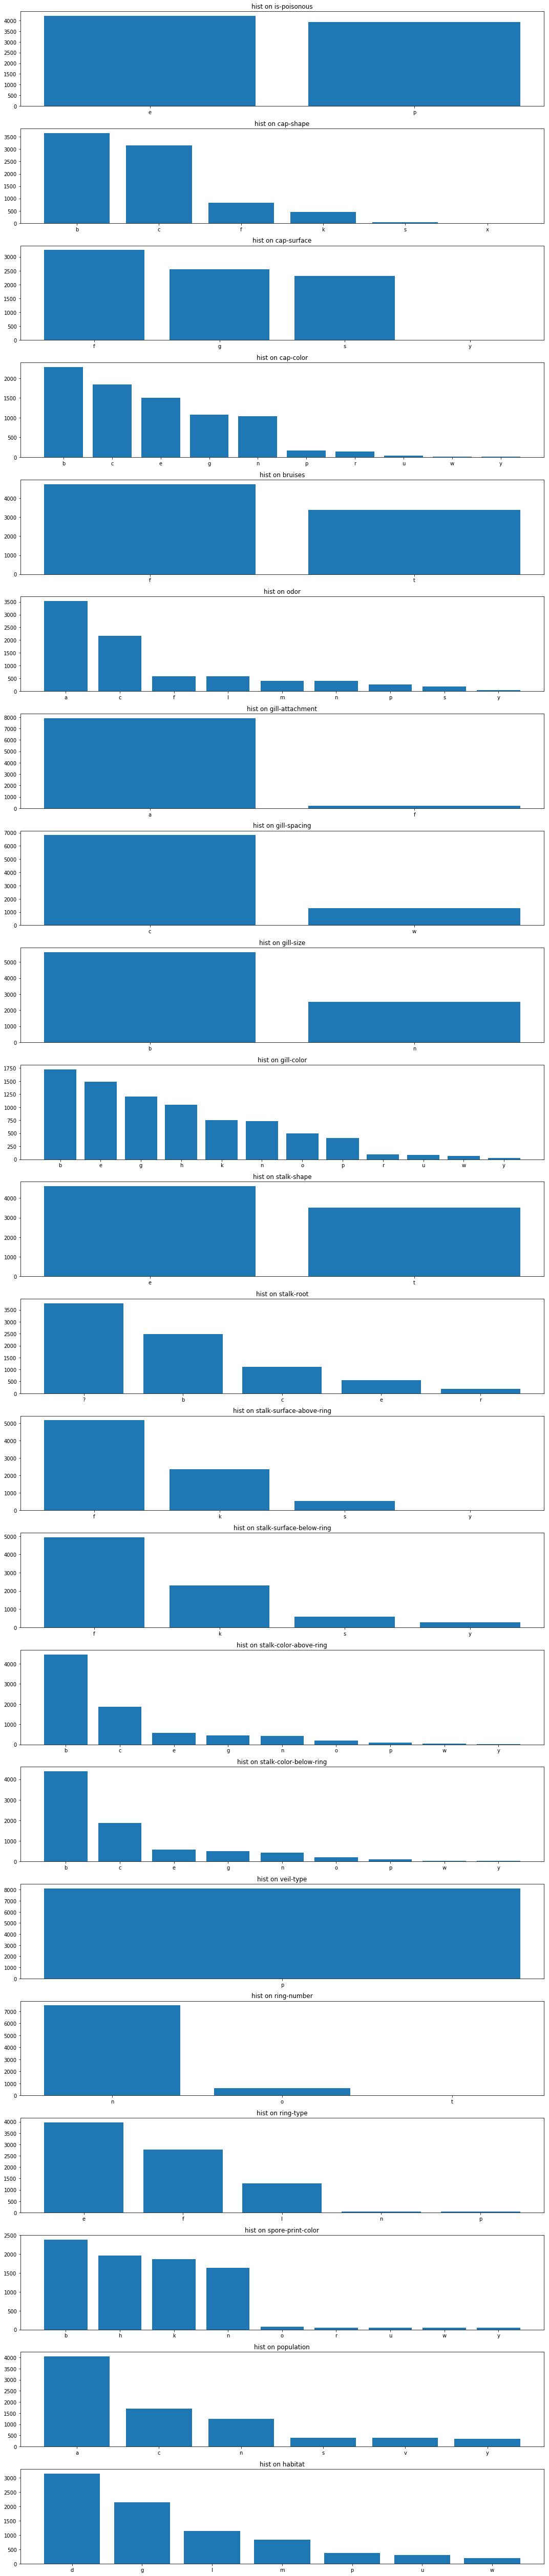

In [59]:
fig = plt.figure(figsize=(15, 70))

i = 1
for f in explan_var:

    values = np.unique(data[f])
    val_cnt = data[f].value_counts()

    plt.subplot(22, 1, i)
    plt.bar(x=values, height=val_cnt.values)
    plt.title('hist on {}'.format(f))
    plt.tight_layout()

    i += 1

plt.show()


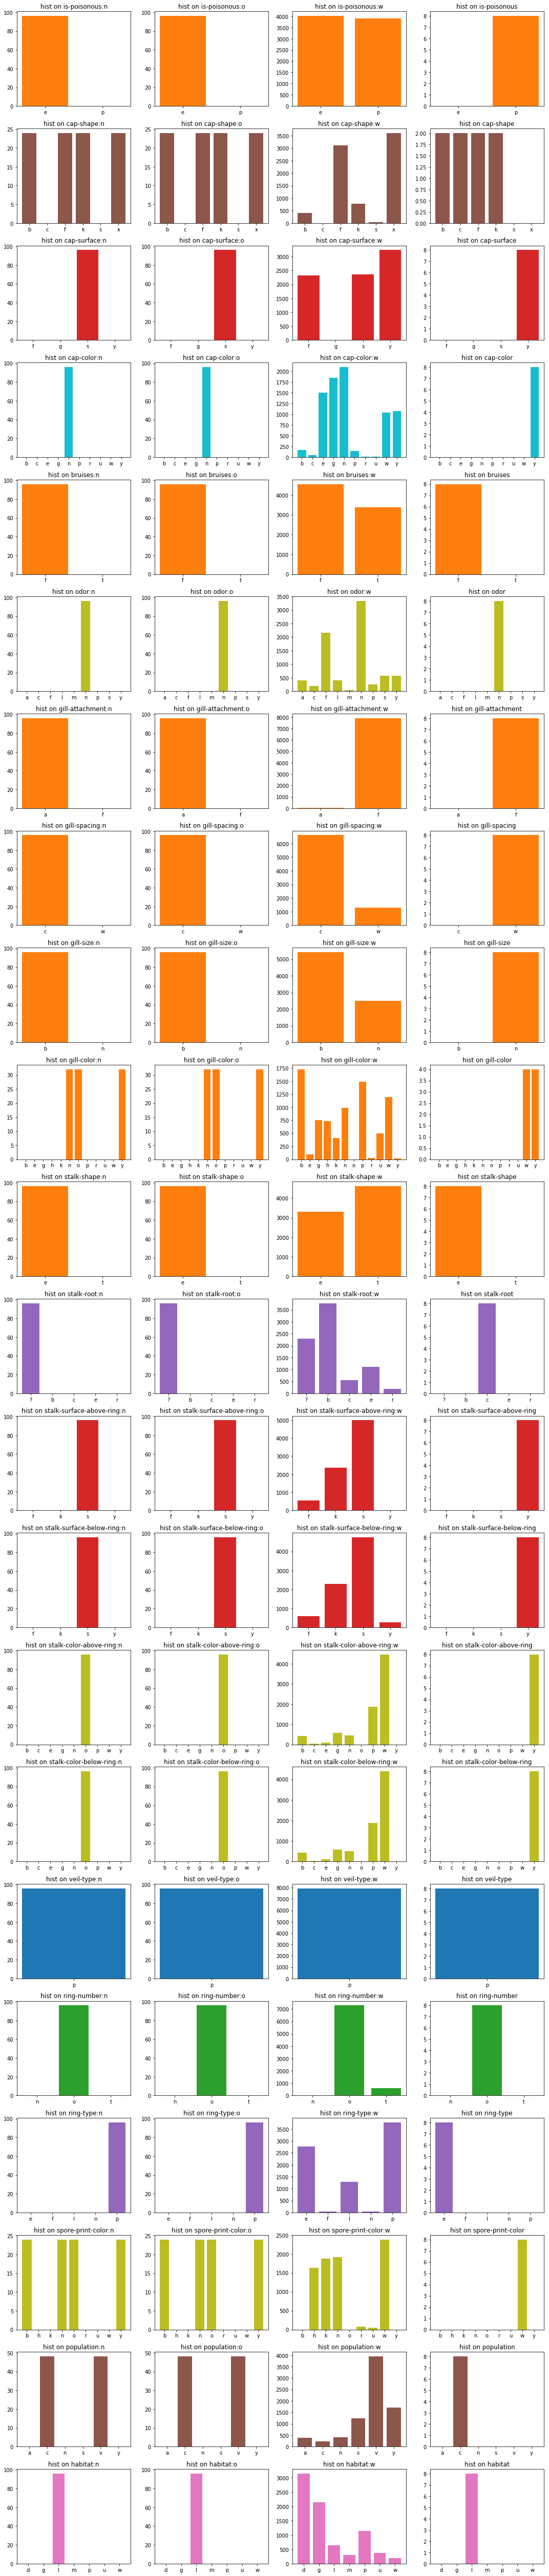

In [61]:
fig = plt.figure(figsize=(15, 70))

total_width = 0.8
n = 4
width = total_width / n

i = 1
for f in explan_var:

    values = np.unique(data[f])
    x = np.arange(len(values))
    x = x - (total_width - width) / 2
    heights = np.zeros((len(values), 4))

    for j, v in enumerate(values):
        val_cnt = data[response_var][data[f] == v].value_counts()

        if 'n' in val_cnt.index:
            heights[j, 0] = val_cnt['n']
        if 'o' in val_cnt.index:
            heights[j, 1] = val_cnt['o']
        if 'w' in val_cnt.index:
            heights[j, 2] = val_cnt['w']
        if 'y' in val_cnt.index:
            heights[j, 3] = val_cnt['y']
    
    for j in range(len(values)):

        plt.subplot(22, 4, i)
        plt.bar(x=values, height=heights[:, 0])
        plt.title('hist on {}:{}'.format(f, 'n'))

        plt.subplot(22, 4, i + 1)
        plt.bar(x=values, height=heights[:, 1])
        plt.title('hist on {}:{}'.format(f, 'o'))

        plt.subplot(22, 4, i + 2)
        plt.bar(x=values, height=heights[:, 2])
        plt.title('hist on {}:{}'.format(f, 'w'))

        plt.subplot(22, 4, i + 3)
        plt.bar(x=values, height=heights[:, 3])
        plt.title('hist on {}:{}'.format(f, 'y'))

    i += 4
    
    plt.title('hist on {}'.format(f))
    plt.tight_layout()

plt.show()

As we can see that distributions are not balanced. Some explanatory variables only contains one value of response variable. And some explanatory variables only have one valid value! What's more, distributions of response variables on each explanatory variable is also not balance. I'll explore relationship between explanatory variables with response variable to see difference between each explanatory.

Because all variables are categorial variable, and some of them are not ordered, I'll use $\chi^2$ value to evaluate relationship between explanatory variables and response variable.

In [62]:
p_dict = {}

for f in explan_var:

    val_cnt = pd.crosstab(data[f], data[response_var])
    chi2, p, freedom, dof = chi2_contingency(val_cnt)

    p_dict[f] = p
p_dict

{'is-poisonous': 3.32097274916963e-41,
 'cap-shape': 1.6617115877322068e-252,
 'cap-surface': 3.8456018806848286e-89,
 'cap-color': 6.121523824617543e-100,
 'bruises': 2.1254423939829577e-31,
 'odor': 6.514334108574294e-43,
 'gill-attachment': 0.0,
 'gill-spacing': 4.867412294177431e-17,
 'gill-size': 1.0064765380067557e-22,
 'gill-color': 0.0,
 'stalk-shape': 5.8055002043268406e-58,
 'stalk-root': 2.407785792803493e-111,
 'stalk-surface-above-ring': 0.0,
 'stalk-surface-below-ring': 1.9206750496678655e-69,
 'stalk-color-above-ring': 0.0,
 'stalk-color-below-ring': 0.0,
 'veil-type': 1.0,
 'ring-number': 0.007870254570688132,
 'ring-type': 1.4657689653279838e-40,
 'spore-print-color': 0.0,
 'population': 2.2682193099326782e-260,
 'habitat': 0.0}

I'll regard p value less then 0.05 as variable related to response variable. Variable selection will perform based on these results.

## Variable selection

In this part I'll perform variable selection on dataset to obtain a smaller dataset. The variable selection will based on relationship between explanatroy variables and response variables explorered in EDA part. These two subsets will be split as train set and test set for ML models.

One subset will remaining all variables and another undergo variable selection.

In [63]:
# The first dataset

data1 = data[explan_var].copy()
label1 = data[response_var].copy()
# The second dataset
data2 = data[explan_var].copy()
label2 = data[response_var].copy()

$\chi^2$ test is used to test dependency between two variables. The smaller p value they have, the less dependency they have. So I'll remain variables with p value less or equal to 0.001.

In [64]:
remaining_var = []
for k, v in p_dict.items():

    if v <= 0.001:
        remaining_var.append(k)

print(len(remaining_var))

20


In [65]:
data2 = data2[remaining_var]

There remaining 21 explanatory variables. Now I'll perform data preparation on these dataset. The main work is convert categorial data into one-hot encoding.


In [66]:
data1 = pd.get_dummies(data1)
print(data1.shape)

data2 = pd.get_dummies(data2)
print(data2.shape)

(8124, 115)
(8124, 111)


One disadvantage of one-hot encoding is that it'll increace dimension of the dataset. So dataset 2 have to undergo dimension reduction.

The second variable selection will use filter method. Variables in one-hot encoding is binary variables and variance threshold method is suitable.

From the EDA result I found that variables are not balanced. So I'll set thrshold to 0.9 to remove variables which contains a value more then $90%$

In [67]:
sel = VarianceThreshold(0.9 * (1 - 0.9))
data2 = sel.fit_transform(data2)

In [68]:
print(data2.shape)

(8124, 52)


Now dimension of dataset 2 reduce to 50, about a half variables are removed.

## Train-Test split

I'll split dataset1 and dataset2 into train set and test set. Models will trained and evaluated on train set and generality will be evaluated on test set.

I'll split these datasets with train size 0.7

In [69]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data1, label1.values, train_size=0.7)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data2, label2.values, train_size=0.7)

## Train and evaluate models

I'll train 2 decision tree and 2 random forest on dataset1 and dataset2. I'll use cross validation with k=5 to evaluate their performance (accuracy)) on each set and evaluate accuracy on test set.

In [71]:
# using 5-fold cross validation
k=5

Decision Tree

In [72]:
dt1 = DecisionTreeClassifier()

print('Decision Tree 1: ')
cv_acc_1 = cross_val_score(dt1, X_train_1, y_train_1, cv=k, scoring=make_scorer(accuracy_score))
print('\tacc: {}'.format(cv_acc_1.mean()))

dt1 = dt1.fit(X_train_1, y_train_1)


Decision Tree 1: 
	acc: 0.9813575329274306


In [73]:
dt2 = DecisionTreeClassifier()

print('Decision Tree 2: ')
cv_acc_2 = cross_val_score(dt2, X_train_2, y_train_2, cv=k, scoring=make_scorer(accuracy_score))
print('\tacc: {}'.format(cv_acc_2.mean()))

dt2 = dt2.fit(X_train_2, y_train_2)

Decision Tree 2: 
	acc: 0.9854028036039713


Accuracy on unseen dataset

In [76]:
pred = dt1.predict(X_test_1)
acc = accuracy_score(pred, y_test_1)
print(acc)

conf_mat = multilabel_confusion_matrix(pred, y_test_1,labels=["n", "o", "w","y"])
print(conf_mat)
print()
target_names = ['brown', 'orange', 'white','yellow']
print(classification_report(y_test_1, pred, target_names=target_names))


0.9799015586546349
[[[2376   19]
  [  30   13]]

 [[2388   30]
  [  19    1]]

 [[  67    0]
  [   0 2371]]

 [[2434    0]
  [   0    4]]]

              precision    recall  f1-score   support

       brown       0.30      0.41      0.35        32
      orange       0.05      0.03      0.04        31
       white       1.00      1.00      1.00      2371
      yellow       1.00      1.00      1.00         4

    accuracy                           0.98      2438
   macro avg       0.59      0.61      0.60      2438
weighted avg       0.98      0.98      0.98      2438



In [78]:
pred = dt2.predict(X_test_2)
acc = accuracy_score(pred, y_test_2)
print(acc)

conf_mat = multilabel_confusion_matrix(pred, y_test_2,labels=["n", "o", "w","y"])
print(conf_mat)
print()
target_names = ['brown', 'orange', 'white','yellow']
print(classification_report(y_test_2, pred, target_names=target_names))


0.9823625922887613
[[[2381   19]
  [  24   14]]

 [[2392   24]
  [  19    3]]

 [[  61    0]
  [   0 2377]]

 [[2437    0]
  [   0    1]]]

              precision    recall  f1-score   support

       brown       0.37      0.42      0.39        33
      orange       0.14      0.11      0.12        27
       white       1.00      1.00      1.00      2377
      yellow       1.00      1.00      1.00         1

    accuracy                           0.98      2438
   macro avg       0.63      0.63      0.63      2438
weighted avg       0.98      0.98      0.98      2438



Random forest

In [79]:
rf1 = RandomForestClassifier()

print('Random Forest 1: ')
cv_acc_1 = cross_val_score(rf1, X_train_1, y_train_1, cv=k, scoring=make_scorer(accuracy_score))
print('\tacc: {}'.format(cv_acc_1.mean()))

rf1 = rf1.fit(X_train_1, y_train_1)

Random Forest 1: 
	acc: 0.9801266861734932


In [80]:
rf2 = RandomForestClassifier()

print('Random Forest 2: ')
cv_acc_2 = cross_val_score(rf2, X_train_2, y_train_2, cv=k, scoring=make_scorer(accuracy_score))
print('\tacc: {}'.format(cv_acc_2.mean()))

rf2 = rf2.fit(X_train_2, y_train_2)

Random Forest 2: 
	acc: 0.9859305080894594


Accuracy on unseen dataset

In [81]:
pred = rf1.predict(X_test_1)
acc = accuracy_score(pred, y_test_1)
print(acc)

conf_mat = multilabel_confusion_matrix(pred, y_test_1,labels=["n", "o", "w","y"])
print(conf_mat)
print()
target_names = ['brown', 'orange', 'white','yellow']
print(classification_report(y_test_1, pred, target_names=target_names))


0.9799015586546349
[[[2382   25]
  [  24    7]]

 [[2382   24]
  [  25    7]]

 [[  67    0]
  [   0 2371]]

 [[2434    0]
  [   0    4]]]

              precision    recall  f1-score   support

       brown       0.23      0.22      0.22        32
      orange       0.22      0.23      0.22        31
       white       1.00      1.00      1.00      2371
      yellow       1.00      1.00      1.00         4

    accuracy                           0.98      2438
   macro avg       0.61      0.61      0.61      2438
weighted avg       0.98      0.98      0.98      2438



In [82]:
pred = rf2.predict(X_test_2)
acc = accuracy_score(pred, y_test_2)
print(acc)

conf_mat = multilabel_confusion_matrix(pred, y_test_2,labels=["n", "o", "w","y"])
print(conf_mat)
print()
target_names = ['brown', 'orange', 'white','yellow']
print(classification_report(y_test_2, pred, target_names=target_names))


0.9823625922887613
[[[2384   22]
  [  21   11]]

 [[2389   21]
  [  22    6]]

 [[  61    0]
  [   0 2377]]

 [[2437    0]
  [   0    1]]]

              precision    recall  f1-score   support

       brown       0.34      0.33      0.34        33
      orange       0.21      0.22      0.22        27
       white       1.00      1.00      1.00      2377
      yellow       1.00      1.00      1.00         1

    accuracy                           0.98      2438
   macro avg       0.64      0.64      0.64      2438
weighted avg       0.98      0.98      0.98      2438



## Conclusion

I construct 2 decision trees and 2 random forest models and trained them on different datasets. For decision trees, both of 2 models have higher accuracy on the training set. But model 2 has higher accuracy on the testing set, also model 2 has high average precision, recall, and f1 score, which indicates that model 2 has higher performance on unseen data. It will benefit to production. What's more, dataset 2 undergo variable selection twice, so it has lower dimension which can help model avoid overfitting. So I think the best decision tree model is model 2.

For random forest, the situation is similar to decision tree. Both of them have high accuracy, but model 2 has higher accuracy on test set, also model 2 has higher average precision, recall, and f1 score. So I think the best random forest model is model 2.

What's more, I think random forest model 2 is better than decision tree model 2 since they have similar accuracy, but the random forest has higher average precision, recall, and f1 score, also random forest is an embedding-learning algorithm which is unlike to overfit and always has higher generalization performance than single tree classifier. So the total best model is random forest model 2.